# PPMI

In [1]:
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'I like animals. But I don\'t like bags.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
np.set_printoptions(precision=3)
print('convariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

convariance matrix
[[0 1 0 0 1 1 0]
 [1 0 1 0 0 1 1]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 1]
 [1 0 0 1 0 0 0]
 [1 1 0 0 0 0 0]
 [0 1 0 1 0 0 0]]
--------------------------------------------------
PPMI
[[0.    0.585 0.    0.    1.585 1.585 0.   ]
 [0.585 0.    1.17  0.    0.    1.17  1.17 ]
 [0.    1.17  0.    1.585 0.    0.    0.   ]
 [0.    0.    1.585 0.    1.585 0.    1.585]
 [1.585 0.    0.    1.585 0.    0.    0.   ]
 [1.585 1.17  0.    0.    0.    0.    0.   ]
 [0.    1.17  0.    1.585 0.    0.    0.   ]]


# SVD

共起行列
[0 1 0 0 1 1 0]
--------------------------------------------------
PPMI
[0.    0.585 0.    0.    1.585 1.585 0.   ]
--------------------------------------------------
SVD
[-3.702e-01 -2.483e-01  6.598e-01  5.479e-01  1.164e-01  2.285e-01
  1.627e-16]
--------------------------------------------------
SVD 2dim
[-0.37  -0.248]


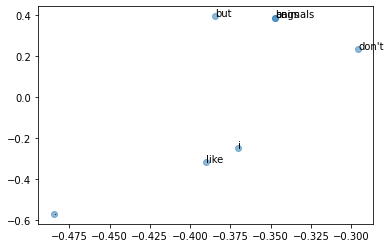

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'I like animals. But I don\'t like bags.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U, S, D = np.linalg.svd(W)

print("共起行列")
print(C[0])
print("-"*50)
print("PPMI")
print(W[0])
print("-"*50)
print("SVD")
print(U[0])
print("-"*50)
print("SVD 2dim")
print(U[0, :2])

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()